# Mult Plants Diseases Classifiction Using CNN

In [1]:
#import data by kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:13<00:00, 239MB/s]
100% 2.70G/2.70G [00:13<00:00, 215MB/s]


In [4]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip') 
zip_ref.extractall('/content/Data')
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from  keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D
from keras.callbacks import EarlyStopping 

In [6]:
#dataset path
train_data = "/content/Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_data = "/content/Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [7]:
#split dataset path in train test
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_data,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="training",
                                                               seed=123)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_data,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="validation",
                                                               seed=123)

Found 70295 files belonging to 38 classes.
Using 56236 files for training.
Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


In [8]:
#check class
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

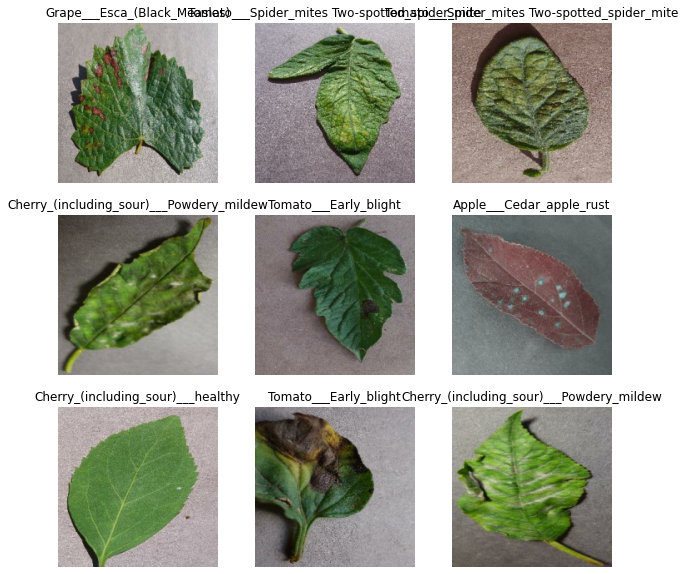

In [9]:
#data set check and plot
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [10]:
# Criando o modelo base em cima do modelo MobileNetV3
base_model = keras.applications.MobileNetV3Small(input_shape=(224, 224, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

4334752/4334752 [==============================] - 0s 0us/step


In [11]:
# Freeze convolutional base
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [12]:
data_augmentation = keras.models.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2)
])

In [13]:
num_classes = len(class_names)

inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [14]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 38)                21926     
                                                                 
Total params: 961,046
Trainable params: 21,926
Non-trainable 

In [15]:
#fitting model
initial_epochs = 10

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

history = model.fit(train_data, 
          validation_data=test_data,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/10
1758/1758 [==============================] - 128s 67ms/step - loss: 0.6271 - accuracy: 0.8469 - val_loss: 0.2270 - val_accuracy: 0.9394
Epoch 2/10
1758/1758 [==============================] - 85s 48ms/step - loss: 0.2151 - accuracy: 0.9406 - val_loss: 0.1525 - val_accuracy: 0.9565
Epoch 3/10
1758/1758 [==============================] - 80s 45ms/step - loss: 0.1632 - accuracy: 0.9531 - val_loss: 0.1272 - val_accuracy: 0.9622
Epoch 4/10
1758/1758 [==============================] - 80s 45ms/step - loss: 0.1415 - accuracy: 0.9571 - val_loss: 0.1098 - val_accuracy: 0.9641
Epoch 5/10
1758/1758 [==============================] - 80s 45ms/step - loss: 0.1264 - accuracy: 0.9615 - val_loss: 0.1008 - val_accuracy: 0.9684
Epoch 6/10
1758/1758 [==============================] - 81s 46ms/step - loss: 0.1187 - accuracy: 0.9631 - val_loss: 0.0959 - val_accuracy: 0.9696
Epoch 7/10
1758/1758 [==============================] - 88s 50ms/step - loss: 0.1112 - accuracy: 0.9644 - val_loss: 0.0928 

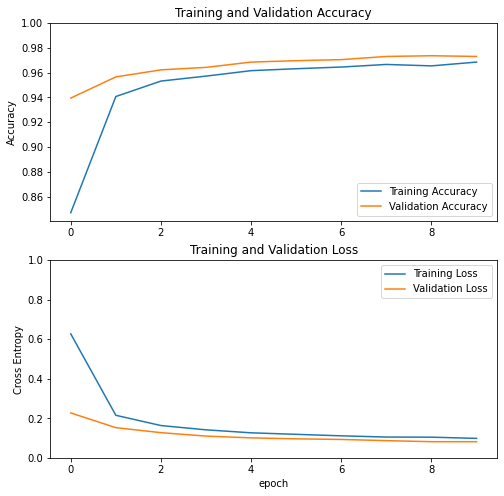

In [16]:
#check accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
preds = model.predict_generator(test_data)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

<ipython-input-17-7ac99cd75930>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_data)


[ 1 16 37 ... 32 37 21]


In [24]:
#Visualize the result
results = model.evaluate(test_data, verbose=0)

In [25]:
print("Test Loss: {:.5f}".format(results[0]))
print("Accuracy on the test set: {:.2f}%".format(results[1] * 100))

Test Loss: 0.08150
Accuracy on the test set: 97.30%


1/1 [==============================] - 1s 1s/step


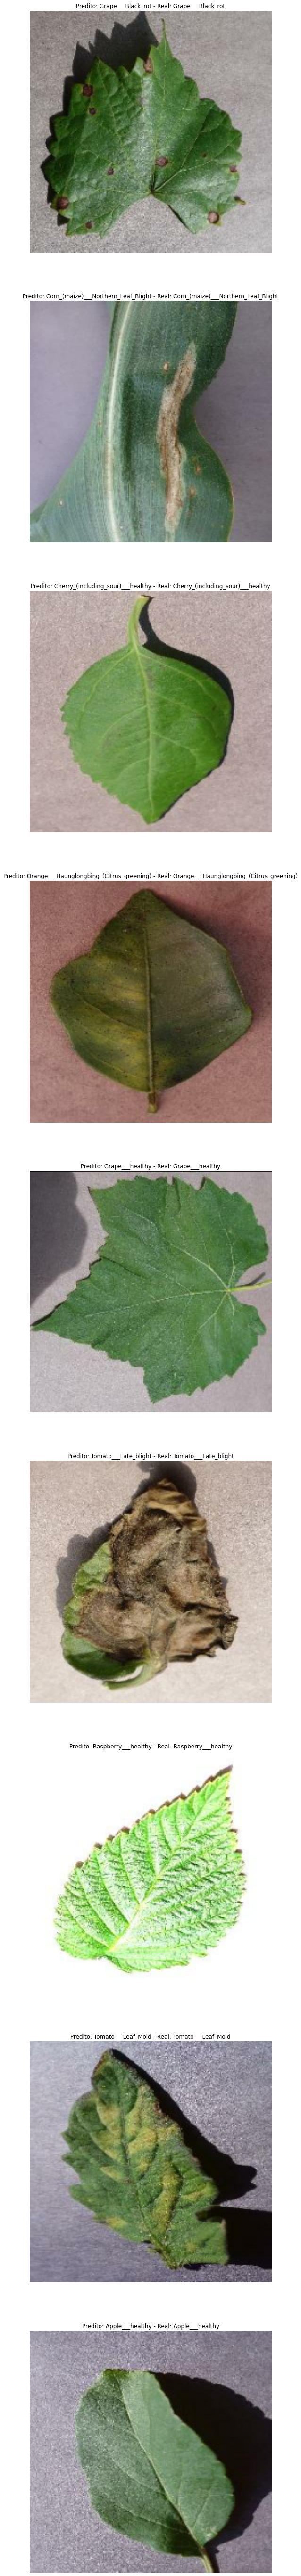

In [26]:
# Model testing
plt.figure(figsize=(10, 100))
for images, labels in test_data.take(1):
    prediction = model.predict(images,batch_size=32)
    for i in range(9):
        ax = plt.subplot(9, 1, i+1)
        pred = np.argmax(prediction[i])
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predito: {class_names[pred]} - Real: {class_names[labels[i]]}')
        plt.axis('off')

In [27]:
#model save
model.save('Plant_diease.h5')